**SEMINAR 3**

Jan Prats 213927 | Oscar Sanz 253613 | Julia Pérez 267029

**Part 1: Data preparation & Analysis**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score
%matplotlib inline

drive.mount('/content/drive')


#Path Oscar
base_path = '/content/drive/MyDrive/MLN_Seminari3/'

#Cargar los dats
rssi_data = pd.read_csv(base_path + 'rssi_data.csv', header=None)
labels_data = pd.read_csv(base_path + 'labels_data.csv', header=None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


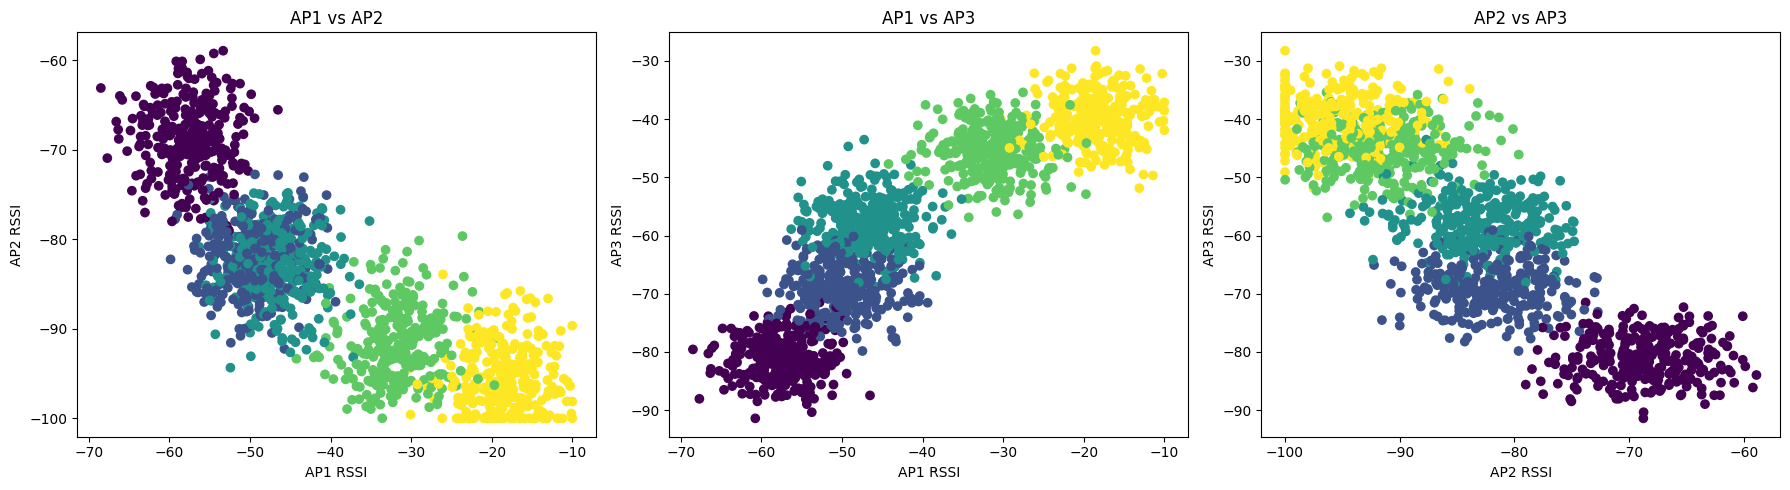

In [ ]:
plt.figure(figsize=(18,5))

# AP1 vs AP2
plt.subplot(1,3,1)
plt.scatter(rssi_data[0], rssi_data[1], c=labels_data[0], cmap='viridis')  #el viridis es un mapa de colors per pintar els punts
plt.title('AP1 vs AP2')
plt.xlabel('AP1 RSSI')
plt.ylabel('AP2 RSSI')

# AP1 vs AP3
plt.subplot(1,3,2)
plt.scatter(rssi_data[0], rssi_data[2], c=labels_data[0], cmap='viridis')
plt.xlabel('AP1 RSSI')
plt.ylabel('AP3 RSSI')
plt.title('AP1 vs AP3')

# AP2 vs AP3
plt.subplot(1,3,3)
plt.scatter(rssi_data[1], rssi_data[2], c=labels_data[0], cmap='viridis')
plt.xlabel('AP2 RSSI')
plt.ylabel('AP3 RSSI')
plt.title('AP2 vs AP3')

plt.tight_layout()
plt.show()


Els valors són negatius perque perque la potencia del Wi-Fi es mesura en decibels/miliwats i a la pràctica és un valor negatiu.

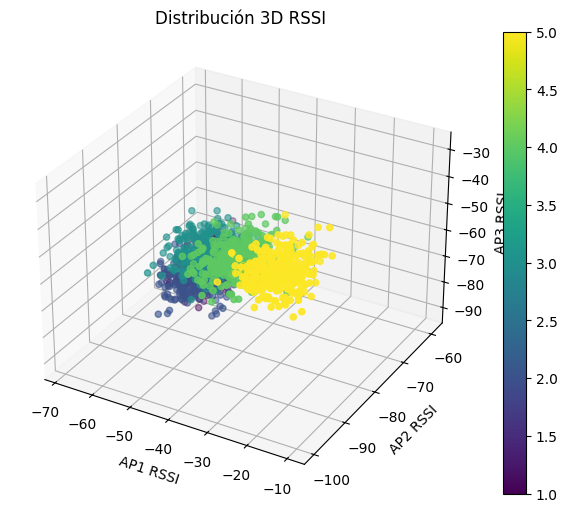

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rssi_data[0], rssi_data[1], rssi_data[2], c=labels_data[0], cmap='viridis')
ax.set_xlabel('AP1 RSSI')
ax.set_ylabel('AP2 RSSI')
ax.set_zlabel('AP3 RSSI')
plt.title('Distribution 3D RSSI')
plt.colorbar(scatter)
plt.show()

In [ ]:
# Concatenamos RSSI y los labels
data = pd.concat([rssi_data, labels_data], axis=1)
data.columns = ['AP1', 'AP2', 'AP3', 'Position']

#MEan y Std
stats = data.groupby('Position').agg(['mean', 'std'])
print(stats)


                AP1                  AP2                  AP3          
               mean       std       mean       std       mean       std
Position                                                               
1        -57.547793  3.676167 -68.772187  4.041594 -81.156930  3.748209
2        -49.811667  3.892066 -81.979633  3.760133 -68.978473  3.869161
3        -46.740827  3.951756 -82.877667  3.981708 -57.633320  4.141495
4        -31.584760  4.058027 -91.492630  3.944587 -45.475647  4.102736
5        -18.477953  3.860880 -95.344790  3.531129 -40.081403  4.128701


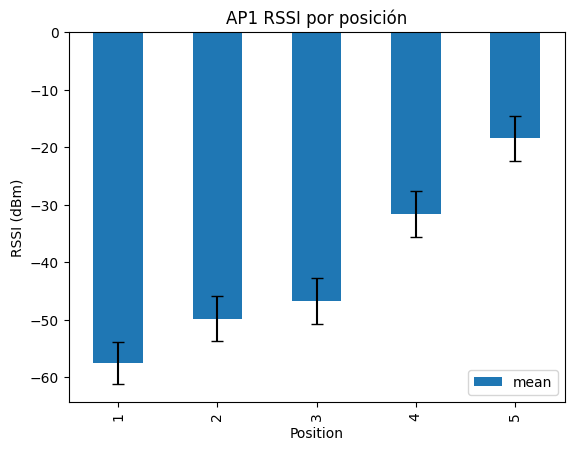

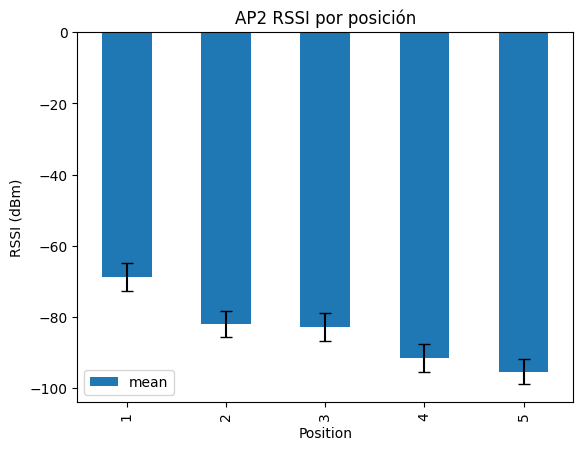

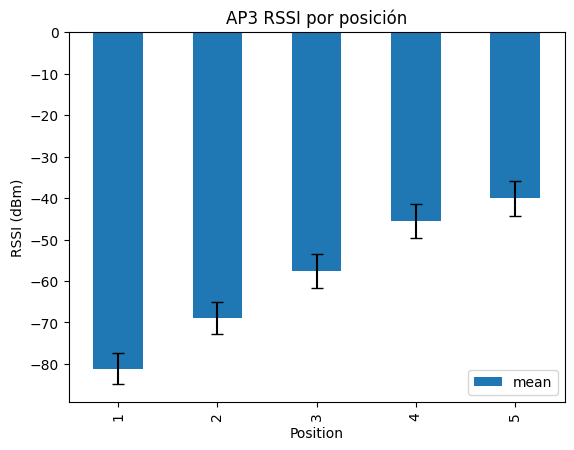

In [ ]:
#Plotamos los resultados anteriores
for ap in ['AP1', 'AP2', 'AP3']:
  stats[ap].plot(kind='bar', y='mean', yerr='std', capsize=4, title=f'{ap} RSSI por posición')
  plt.ylabel('RSSI (dBm)')
  plt.show()

**Part 2: k-means implementation**

In [ ]:
def kmeans(X, k=5, max_iters=100):
    centroids = X.sample(k).values  #primer iniciem els centroides de manera random
    for iteration in range(max_iters):
        #asignem els punts al centroide més proper
        distances = np.linalg.norm(X.values[:, np.newaxis] - centroids, axis=2)
        cluster_labels = np.argmin(distances, axis=1)

        #ara tornem a calcular els centroides depenen dels punts
        new_centroids = np.array([
            X.values[cluster_labels == i].mean(axis=0)
            if len(X.values[cluster_labels == i]) > 0
            else X.sample(1).values[0]  # Reinicializa si vacío
            for i in range(k)
        ])

        #comprovem la convergencia
        if np.allclose(centroids, new_centroids):
            print(f'Ha convergit en {iteration} iteracions.')
            break
        centroids = new_centroids
    return cluster_labels, centroids


Ha convergit en 9 iteracions.


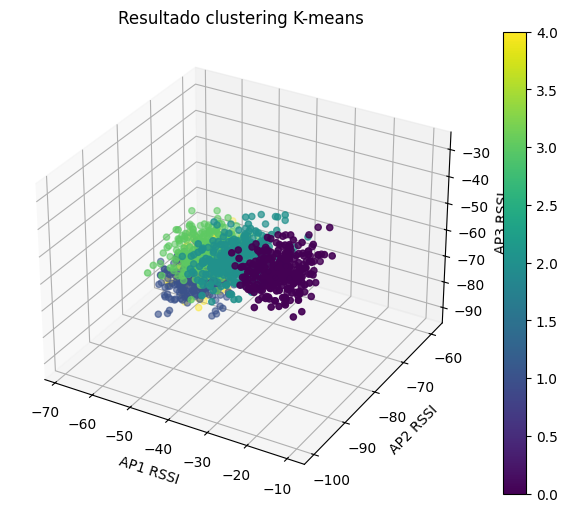

In [ ]:
cluster_labels, centroids = kmeans(rssi_data, k=5)

#utilitzem l'algoritme d'abans amb els datsets que tenim
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rssi_data[0], rssi_data[1], rssi_data[2], c=cluster_labels, cmap='viridis')
ax.set_xlabel('AP1 RSSI')
ax.set_ylabel('AP2 RSSI')
ax.set_zlabel('AP3 RSSI')
plt.title('Resultado clustering K-means')
plt.colorbar(scatter)
plt.show()
